Tutorial 2: Profiles
====================

This tutorial introduces `Profile` objects, specifically:

 - `LightProfile`'s: which represent analytic forms for the light distribution of galaxies.
 - `MassProfile`'s: which represent analytic forms for the mass distributions of galaxies.

By passing these objects 2D grids of $(y,x)$ coordinates we can create images from a light profile and deflection
angle maps from a mass prfoile, the latter of which will ultimately describe how light is ray-traced throughout the
Universe by a strong gravitational lens!

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


__Initial Setup__

We first setup a `Grid2D`, which uses the same resolution and arc-second to pixel conversion as the previous tutorial.

In [2]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05)

__Light Profiles__

We now create a `LightProfile` using the `light_profiles` module, which is access via `lp` for  conciseness. we'll use 
the elliptical Sersic light profile (using the `EllSersic` object), which is an analytic function used throughout
studies of galaxy morphology to represent their light. 

You'll note that we use `Ell` to concisely describe that this profile is elliptical. If you are unsure what 
the `elliptical_comps` are, I'll give a description of them at the end of the tutorial.

In [3]:
sersic_light_profile = al.lp.EllSersic(
    centre=(0.0, 0.0),
    elliptical_comps=(0.0, 0.111111),
    intensity=1.0,
    effective_radius=1.0,
    sersic_index=2.5,
)

By printing a `Profile` we can display its parameters.

In [4]:
print(sersic_light_profile)

EllSersic
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.111111)
axis_ratio: 0.800000180000018
angle: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5


__Images__

We next pass the `Grid2D` to the `sersic_light_profile`, to compute the intensity of the Sersic at every (y,x) 
coordinate on our two dimension grid. This uses the `image_2d_from_grid` method, and you'll see throughout this tutorial 
that **PyAutoLens** has numerous `_from_grid` methods for computing quantities from a grid.

In [5]:
light_image = sersic_light_profile.image_2d_from_grid(grid=grid)

Much like the `Grid2D` objects discussed in the previous tutorial, this returns an `Array2D` object:

In [6]:
print(type(light_image))

<class 'autoarray.structures.arrays.two_d.array_2d.Array2D'>


Just like a grid, the `Array2D` object has both `native` and `slim` attributes:

In [7]:
print("Intensity of pixel 0:")
print(light_image.native[0, 0])
print("Intensity of pixel 1:")
print(light_image.slim[1])

Intensity of pixel 0:
0.04609912932176421
Intensity of pixel 1:
0.04723487566981192


For an `Array2D`, the dimensions of these attributes are as follows:

 - `native`: an ndarray of shape [total_y_image_pixels, total_x_image_pixels].

 - `slim`: an ndarray of shape [total_y_image_pixels*total_x_image_pixels].

The `native` and `slim` dimensions are therefore analogous to those of the `Grid2D` object, but without the final 
dimension of 2.

In [8]:
print(light_image.shape_native)
print(light_image.shape_slim)

(100, 100)
10000


We can use a `LightProfilePlotter` to plot the image of a light profile. We pass this plotter the light profile and
a grid, which are used to create the image that is plotted.

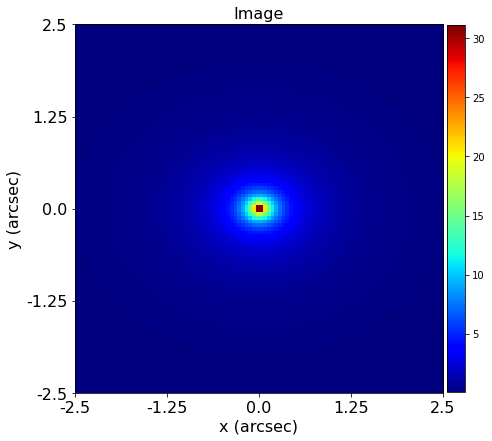

In [9]:
light_profile_plotter = aplt.LightProfilePlotter(
    light_profile=sersic_light_profile, grid=grid
)
light_profile_plotter.figures_2d(image=True)

__Mass Profiles__

To perform ray-tracing, we require `MassProfile`'s, which are created via the `mass_profiles` module and which is 
accessed via `mp` for conciseness. 

A `MassProfile` is an analytic function that describes the distribution of mass in a galaxy, and therefore 
can be used to derive its surface-density, gravitational potential and, most importantly, its deflection angles. In
gravitational lensing, the deflection angles describe how light is deflected by the `MassProfile` due to the curvature 
of space-time.

You'll note that we use `Sph` to concisely describe that this profile is spherical.

In [10]:
sis_mass_profile = al.mp.SphIsothermal(centre=(0.0, 0.0), einstein_radius=1.6)

print(sis_mass_profile)

SphIsothermal
centre: (0.0, 0.0)
elliptical_comps: (0.0, 0.0)
axis_ratio: 1.0
angle: 0.0
einstein_radius: 1.6
slope: 2.0
core_radius: 0.0


__Deflection Angles__

We can again use a `from_grid_` method to compute the deflection angles of a mass profile from a grid. 

The deflection angles are returned as the arc-second deflections of the grid's $(y,x)$ Cartesian components. This again 
uses the `Grid2D``s object meaning that we can access the deflection angles via the `native` and `slim` attributes. 

(If you are still unclear what exactly a deflection angle means or how it will help us with gravitational lensing,
things should become a lot clearer in tutorial 4 of this chapter. For now, just look at the pretty pictures they make!).

In [11]:
mass_profile_deflections = sis_mass_profile.deflections_2d_from_grid(grid=grid)

print("deflection-angles of `Grid2D` pixel 0:")
print(mass_profile_deflections.native[0, 0])
print("deflection-angles of `Grid2D` pixel 1:")
print(mass_profile_deflections.slim[1])
print()

deflection-angles of `Grid2D` pixel 0:
[ 1.13137085 -1.13137085]
deflection-angles of `Grid2D` pixel 1:
[ 1.14285595 -1.11976795]



A `MassProfilePlotter` can plot the deflection angles.

(The black and red lines are called the `critical curve` and `caustic`. we'll cover what these are in a later tutorial.)

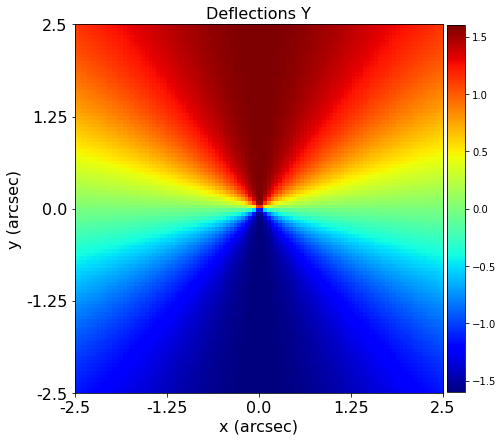

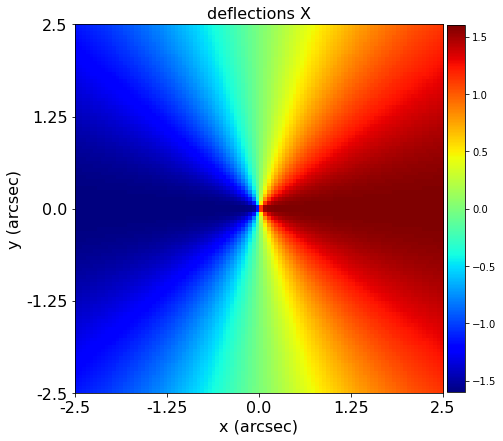

In [12]:
mass_profile_plottter = aplt.MassProfilePlotter(
    mass_profile=sis_mass_profile, grid=grid
)
mass_profile_plottter.figures_2d(deflections_y=True, deflections_x=True)

__Other Properties__

`MassProfile`'s have a range of other properties that are used for lensing calculations, a couple of which we've plotted 
images of below:

 - `convergence`: The surface mass density of the mass profile in dimensionless units.
 - `potential`: The gravitational of the mass profile again in convenient dimensionless units.
 - `agnification`: Describes how much brighter each image-pixel appears due to focusing of light rays.

Extracting `Array2D`'s of these quantities from **PyAutoLens** is exactly the same as for the image and deflection 
angles above.

In [13]:
mass_profile_convergence = sis_mass_profile.convergence_2d_from_grid(grid=grid)

mass_profile_potential = sis_mass_profile.potential_2d_from_grid(grid=grid)

mass_profile_magnification = sis_mass_profile.magnification_2d_from_grid(grid=grid)

Plotting them is equally straight forward.

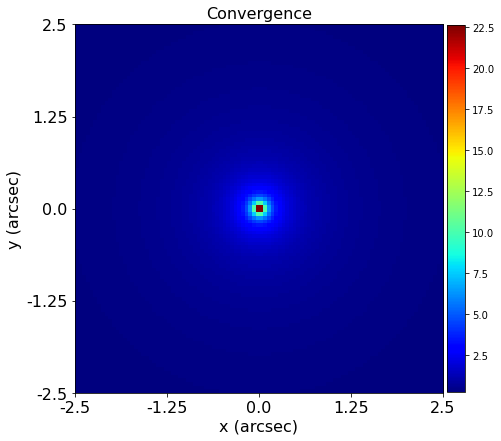

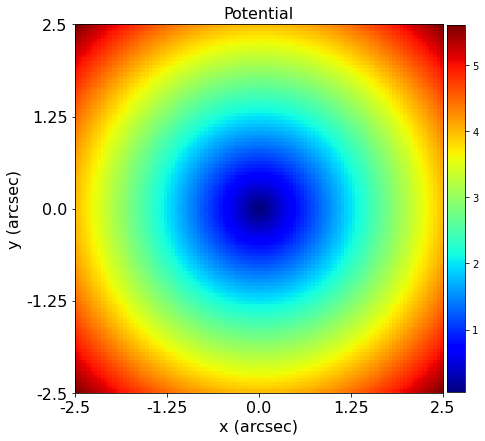

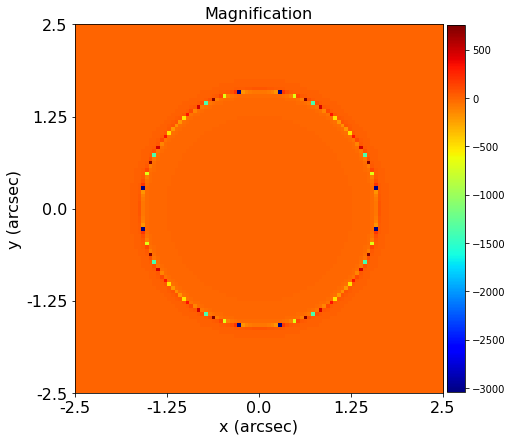

In [14]:
mass_profile_plottter.figures_2d(convergence=True, potential=True, magnification=True)

__Wrap Up__

Congratulations, you`ve completed your second **PyAutoLens** tutorial! Before moving on to the next one, experiment with 
**PyAutoLens** by doing the following:

1) Change the `LightProfile`'s effective radius and Sersic index - how does the image's appearance change?
2) Change the `MassProfile`'s einstein radius - what happens to the deflection angles, potential and convergence?
3) Experiment with different `LightProfile`'s and `MassProfile`'s in the light_profiles and mass_profiles modules. 
In particular, try the `EllIsothermal` `Profile`, which introduces ellipticity into the mass distribution

___Elliptical Components___

The `elliptical_comps` describe the ellipticity of light and mass distributions. 

We can define a coordinate system where an ellipse is defined in terms of:

 - axis_ratio = semi-major axis / semi-minor axis = b/a
 - position angle, where angle is in degrees.

See https://en.wikipedia.org/wiki/Ellipse for a full description of elliptical coordinates.

The elliptical components are related to the axis-ratio and position angle as follows:

    fac = (1 - axis_ratio) / (1 + axis_ratio)
    
    elliptical_comp[0] = elliptical_comp_y = fac * np.sin(2 * angle)
    elliptical_comp[1] = elliptical_comp_x = fac * np.cos(2 * angle)

We can use the **PyAutoLens** `convert` module to determine the elliptical components from an `axis_ratio` and `angle`,
noting that the position angle is defined counter-clockwise from the positive x-axis.

In [15]:
elliptical_comps = al.convert.elliptical_comps_from(axis_ratio=0.5, angle=45.0)

print(elliptical_comps)

(0.3333333333333333, 2.041077998578922e-17)


The reason light profiles and mass profiles use the elliptical components instead of an axis-ratio and position angle is
because it improves the lens modeling process. What is lens modeling? You'll find out in chapter 2!